# Graph Visualization
* Create tables with the associated graphs
* What are the most jobs offered per area of the US 
* Whate are the top cities to offer jobs
* whate are the top states to offer jobs
* what are the top categories in the country per state and per city
* what are the months with the highest job postings

### Imports

In [1]:
#imports 
import random
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pprint as pprint

### CSV file path variables

In [2]:
# cleaned data file to be saved
cleanData = "../data/cleanData/master_clean_data.csv"
cityData = "../data/cleanData/master_city_data.csv"
visualizationData = "../data/vizData/master_clean_data.csv"

catGraphData = "../data/vizData/master_Graph_Top_5_Categories.png"
cityGraphData = "../data/vizData/master_Graph_Top_5_Cities.png"
stateGraphData = "../data/vizData/master_Graph_Top_5_State.png"
topStateCatGraphData = "../data/vizData/master_Graph_Top_State_Top_5_Category.png"
topCityCatGraphData = "../data/vizData/master_Graph_Top_City_Top_5_Category.png"

topJobsPlotPerMonth = "../data/vizData/master_Plot_Total_Job_Postings_Month.png"
topJobsPlotStateMonth = "../data/vizData/master_Plot_State_Job_Postings_Month.png"
topJobsPlotCityMonth = "../data/vizData/master_Plot_City_Job_Postings_Month.png"
topCatPlotCityMonth = "../data/vizData/master_Plot_Category_Job_Postings_Month.png"

# path csv file location
pathCleanData ="../datacleanData/"

#### Calling csv file

In [3]:
#Pull clean data
#calling the csv cleanData folder
cleansed_data_df = pd.read_csv(cleanData)
cleansed_data_df.head(3)

,job posting id,job title,date created,category,company name,city,state,country,lat,lng,latlng
0,1312805843,Physician: Core Faculty Family Medicine Job in...,2019-10-25 12:38:55,Healthcare & Nursing Jobs,CompHealth,Indiana,Pennsylvania,United States,40.621455,-79.152535,"40.621455,-79.152535"
1,1312804908,Physician: Associate Regional Medical Officer ...,2019-10-25 12:38:30,Healthcare & Nursing Jobs,CompHealth,San Jose,California,United States,37.390494,-121.885434,"37.390494,-121.885434"
2,1312806070,Physician: Child and Adolescent Psychiatry Pos...,2019-10-25 12:39:00,Healthcare & Nursing Jobs,CompHealth,Norwich,New York,United States,42.522869,-75.574677,"42.522869,-75.57467700000002"


#### Lowecase the column names

In [4]:
#Lowercase all column names 
cleansed_data_df.columns = map(str.lower, cleansed_data_df.columns)
cleansed_data_df.head(3)

,job posting id,job title,date created,category,company name,city,state,country,lat,lng,latlng
0,1312805843,Physician: Core Faculty Family Medicine Job in...,2019-10-25 12:38:55,Healthcare & Nursing Jobs,CompHealth,Indiana,Pennsylvania,United States,40.621455,-79.152535,"40.621455,-79.152535"
1,1312804908,Physician: Associate Regional Medical Officer ...,2019-10-25 12:38:30,Healthcare & Nursing Jobs,CompHealth,San Jose,California,United States,37.390494,-121.885434,"37.390494,-121.885434"
2,1312806070,Physician: Child and Adolescent Psychiatry Pos...,2019-10-25 12:39:00,Healthcare & Nursing Jobs,CompHealth,Norwich,New York,United States,42.522869,-75.574677,"42.522869,-75.57467700000002"


#### Creating a month column

In [5]:
cleansed_data_df['month'] = pd.DatetimeIndex(cleansed_data_df['date created']).month
cleansed_data_df.head()

,job posting id,job title,date created,category,company name,city,state,country,lat,lng,latlng,month
0,1312805843,Physician: Core Faculty Family Medicine Job in...,2019-10-25 12:38:55,Healthcare & Nursing Jobs,CompHealth,Indiana,Pennsylvania,United States,40.621455,-79.152535,"40.621455,-79.152535",10
1,1312804908,Physician: Associate Regional Medical Officer ...,2019-10-25 12:38:30,Healthcare & Nursing Jobs,CompHealth,San Jose,California,United States,37.390494,-121.885434,"37.390494,-121.885434",10
2,1312806070,Physician: Child and Adolescent Psychiatry Pos...,2019-10-25 12:39:00,Healthcare & Nursing Jobs,CompHealth,Norwich,New York,United States,42.522869,-75.574677,"42.522869,-75.57467700000002",10
3,1328242120,Physician: Anesthesiology Medical Director Job...,2019-11-06 20:28:24,Healthcare & Nursing Jobs,CompHealth,Dunkirk,New York,United States,42.479502,-79.333932,"42.479502000000004,-79.33393199999998",11
4,1328242475,Physician: General Anesthesia Position North o...,2019-11-06 20:29:07,Healthcare & Nursing Jobs,CompHealth,Kittanning,Pennsylvania,United States,40.816453,-79.521989,"40.816453,-79.521989",11


#### Set job posting id as index

In [6]:
#Set job posting id as index
cleansed_data = cleansed_data_df.set_index('job posting id')
cleansed_data.head(3)

,job title,date created,category,company name,city,state,country,lat,lng,latlng,month
job posting id,,,,,,,,,,,
1312805843,Physician: Core Faculty Family Medicine Job in...,2019-10-25 12:38:55,Healthcare & Nursing Jobs,CompHealth,Indiana,Pennsylvania,United States,40.621455,-79.152535,"40.621455,-79.152535",10
1312804908,Physician: Associate Regional Medical Officer ...,2019-10-25 12:38:30,Healthcare & Nursing Jobs,CompHealth,San Jose,California,United States,37.390494,-121.885434,"37.390494,-121.885434",10
1312806070,Physician: Child and Adolescent Psychiatry Pos...,2019-10-25 12:39:00,Healthcare & Nursing Jobs,CompHealth,Norwich,New York,United States,42.522869,-75.574677,"42.522869,-75.57467700000002",10


## Top 5 Categories for job postings

In [7]:
#Group by Category and find the top Categories for job postings
cat_grouped = cleansed_data.groupby(['category']).count()
cat_grouped = cat_grouped.reset_index()
cat_grouped_asc = cat_grouped.sort_values(by='job title', ascending=False)
cat_grouped_asc.head()

,category,job title,date created,company name,city,state,country,lat,lng,latlng,month
11,Healthcare & Nursing Jobs,26103,26103,26103,26103,26103,26103,26103,26103,26103,26103
15,Logistics & Warehouse Jobs,18685,18685,18685,18685,18685,18685,18685,18685,18685,18685
18,Other/General Jobs,13039,13039,13039,13039,13039,13039,13039,13039,13039,13039
13,IT Jobs,12551,12551,12551,12551,12551,12551,12551,12551,12551,12551
0,Accounting & Finance Jobs,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758


### Graph: Top 5 Categories in the Country

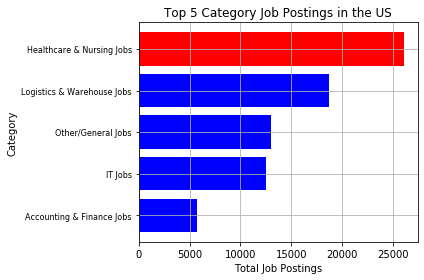

In [8]:
#Defining colors
colors = ['r','b','b','b','b']

#Defining the length of my y axis
y_pos = np.arange(len(cat_grouped_asc['category'][:5]))
#Defining my x axis
performance = cat_grouped_asc["job title"][:5]

#ploting information for y and x
plt.barh(y_pos, performance, align='center', color = colors)

#labeling y ticks and changing the label size to 8
plt.yticks(y_pos,cat_grouped_asc["category"][:5], size = 8)

#Inverting to display the top bar graph
plt.gca().invert_yaxis()  # labels read top-to-bottom

#Adding my labels, title, and definition layout
plt.ylabel('Category')
plt.xlabel('Total Job Postings')
plt.title('Top 5 Category Job Postings in the US')
plt.tight_layout()
plt.grid()

#saving
plt.savefig(catGraphData)

## Top 5 cities that have job postings

In [9]:
#Group by City and state to find the top 5 cities that have job postings
grouped_city = cleansed_data.groupby(['city','state']).count()
grouped_city = grouped_city.reset_index()
grouped_city_desc = grouped_city.sort_values(by='job title', ascending=False)
grouped_city_desc.head()

,city,state,job title,date created,category,company name,country,lat,lng,latlng,month
5048,Los Angeles,California,1721,1721,1721,1721,1721,1721,1721,1721,1721
1628,Chicago,Illinois,1676,1676,1676,1676,1676,1676,1676,1676,1676
7611,San Francisco,California,1334,1334,1334,1334,1334,1334,1334,1334,1334
6144,New York,New York,1220,1220,1220,1220,1220,1220,1220,1220,1220
936,Boston,Massachusetts,1148,1148,1148,1148,1148,1148,1148,1148,1148


### Graph: Top 5 Job Postings in each city in the US

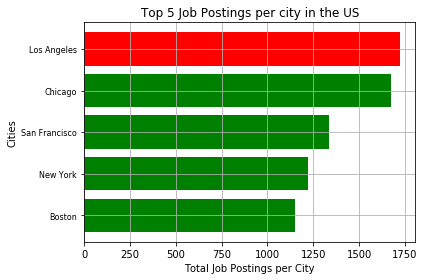

In [10]:
#Defining colors
colors = ['r','g','g','g','g']

#Defining the length of my y axis
y_pos = np.arange(len(grouped_city_desc['category'][:5]))
#Defining my x axis
performance = grouped_city_desc["job title"][:5]

#ploting information for y and x
plt.barh(y_pos, performance, align='center', color = colors)

#labeling y ticks and changing the label size to 8
plt.yticks(y_pos,grouped_city_desc["city"][:5], size = 8)

#Inverting to display the top bar graph
plt.gca().invert_yaxis()  # labels read top-to-bottom

#Adding my labels, title, and definition layout
plt.ylabel('Cities')
plt.xlabel('Total Job Postings per City')
plt.title('Top 5 Job Postings per city in the US')
plt.tight_layout()
plt.grid()

#saving
plt.savefig(cityGraphData)

## Top 5 states that offer jobs

In [11]:
#Group by state to find the top 5 states that offer jobs
grouped_state = cleansed_data.groupby(['state']).count()
grouped_state = grouped_state.reset_index()
grouped_state_desc = grouped_state.sort_values(by='job title', ascending=False)
grouped_state_desc.head()

,state,job title,date created,category,company name,city,country,lat,lng,latlng,month
4,California,15911,15911,15911,15911,15911,15911,15911,15911,15911,15911
43,Texas,7648,7648,7648,7648,7648,7648,7648,7648,7648,7648
13,Illinois,5963,5963,5963,5963,5963,5963,5963,5963,5963,5963
38,Pennsylvania,5747,5747,5747,5747,5747,5747,5747,5747,5747,5747
32,New York,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652


### Graph: Top 5 job postings per state in the US

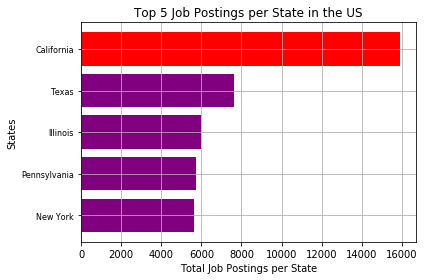

In [12]:
#Defining colors
colors = ['r','purple','purple','purple','purple']

#Defining the length of my y axis
y_pos = np.arange(len(grouped_state_desc['category'][:5]))
#Defining my x axis
performance = grouped_state_desc["job title"][:5]

#ploting information for y and x
plt.barh(y_pos, performance, align='center', color = colors)

#labeling y ticks and changing the label size to 8
plt.yticks(y_pos,grouped_state_desc["state"][:5], size = 8)

#Inverting to display the top bar graph
plt.gca().invert_yaxis()  # labels read top-to-bottom

#Adding my labels, title, and definition layout
plt.ylabel('States')
plt.xlabel('Total Job Postings per State')
plt.title('Top 5 Job Postings per State in the US')
plt.tight_layout()
plt.grid()

#saving
plt.savefig(stateGraphData)

## Top 5 Job categories for the top state in the US
* find the top state and store it in a variable
* Use the variable to filter the dataframe with only the top state data
* Find the top category for the state with the highest jobs

In [13]:
#Group by state to find the top states that offer jobs
top_state = cleansed_data.groupby(['state'])
top_state = top_state['job title']
top_state = top_state.count().idxmax()

top_state

'California'

#### Filter top state with Dataframe

In [14]:
#Filter top state with Dataframe
top_state_data = cleansed_data[cleansed_data['state'].str.contains(top_state)]
top_state_data.head(3)

,job title,date created,category,company name,city,state,country,lat,lng,latlng,month
job posting id,,,,,,,,,,,
1312804908,Physician: Associate Regional Medical Officer ...,2019-10-25 12:38:30,Healthcare & Nursing Jobs,CompHealth,San Jose,California,United States,37.390494,-121.885434,"37.390494,-121.885434",10
1313621383,Physician: Medical Director of Psychiatry Is N...,2019-10-26 03:52:51,Healthcare & Nursing Jobs,CompHealth,Farmington,California,United States,37.928543,-120.943179,"37.928543,-120.943179",10
1312808803,Physician: Temporary Internal/Family Medicine ...,2019-10-25 12:39:59,Healthcare & Nursing Jobs,CompHealth,Modesto,California,United States,37.669746,-120.999103,"37.669746,-120.999103",10


#### Find the top category for the state with the highest jobs

In [15]:
#Find the top category for the state with the highest jobs
top_state_grouped = top_state_data.groupby(['category']).count().reset_index()
tope_state_grouped_asc = top_state_grouped.sort_values(by='job title', ascending=False)
tope_state_grouped_asc

,category,job title,date created,company name,city,state,country,lat,lng,latlng,month
11,Healthcare & Nursing Jobs,2972,2972,2972,2972,2972,2972,2972,2972,2972,2972
15,Logistics & Warehouse Jobs,2487,2487,2487,2487,2487,2487,2487,2487,2487,2487
18,Other/General Jobs,2260,2260,2260,2260,2260,2260,2260,2260,2260,2260
13,IT Jobs,2190,2190,2190,2190,2190,2190,2190,2190,2190,2190
0,Accounting & Finance Jobs,781,781,781,781,781,781,781,781,781,781
5,Customer Services Jobs,731,731,731,731,731,731,731,731,731,731
23,Sales Jobs,517,517,517,517,517,517,517,517,517,517
22,Retail Jobs,508,508,508,508,508,508,508,508,508,508
26,Teaching Jobs,491,491,491,491,491,491,491,491,491,491
1,Admin Jobs,394,394,394,394,394,394,394,394,394,394


### Graph: Top 5 category job postings for the top state in the US

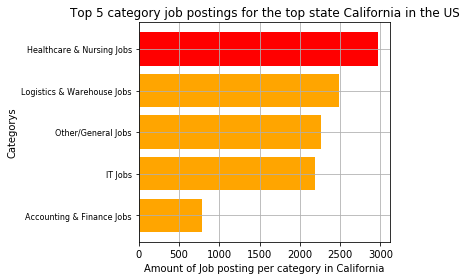

In [16]:
#Defining colors
colors = ['r','orange','orange','orange','orange']

#Defining the length of my y axis
y_pos = np.arange(len(tope_state_grouped_asc['category'][:5]))
#Defining my x axis
performance = tope_state_grouped_asc['job title'][:5]

#ploting information for y and x
plt.barh(y_pos, performance, align='center', color = colors)

#labeling y ticks and changing the label size to 8
plt.yticks(y_pos,tope_state_grouped_asc['category'][:5], size = 8)

#Inverting to display the top bar graph
plt.gca().invert_yaxis()  # labels read top-to-bottom

#Adding my labels, title, and definition layout
plt.ylabel('Categorys')
plt.xlabel(f'Amount of Job posting per category in {top_state}')
plt.title(f'Top 5 category job postings for the top state {top_state} in the US')
plt.tight_layout()
plt.grid()

#saving
plt.savefig(topStateCatGraphData)

## Top 5 Job category for the top city in the US
* find the top city and store it in a variable
* Use the variable to filter the dataframe with only the top state data
* Find the top category for the state with the highest jobs

In [17]:
#Group by city to find the top city that offer jobs
top_city = cleansed_data.groupby(['city'])
top_city = top_city['job title']
top_city = top_city.count().idxmax()

top_city

'Los Angeles'

#### finding the state that has the top city

In [18]:
#Group by city to find the top city and corresponding state that offer jobs
top_citystate = cleansed_data.groupby(['city','state'])
top_citystate = top_citystate['job title']
top_citystate = top_citystate.count().idxmax()
top_citystate = top_citystate[1]
top_citystate

'California'

#### Filter top city with Dataframe

In [19]:
#Filter top city with Dataframe
top_city_data = cleansed_data[cleansed_data['city'].str.contains(top_city)]
top_city_data.head(3)

,job title,date created,category,company name,city,state,country,lat,lng,latlng,month
job posting id,,,,,,,,,,,
1312808483,Physician: Fantastic Pulmonary/Critical Care P...,2019-10-25 12:39:53,Healthcare & Nursing Jobs,CompHealth,Los Angeles,California,United States,34.089929,-118.294103,"34.089929,-118.294103",10
1312805055,Physician: General Adult Psychiatrist Needed i...,2019-10-25 12:38:40,Healthcare & Nursing Jobs,CompHealth,Los Angeles,California,United States,34.115582,-118.270863,"34.115582,-118.27086299999999",10
1331423921,Freight Broker Agents / Agency Owners,2019-11-09 01:49:56,Logistics & Warehouse Jobs,Pathmark Transportation,Los Angeles,California,United States,34.115582,-118.270863,"34.115582,-118.27086299999999",11


#### Find the top category for the city with the highest job postings

In [20]:
#Find the top category for the state with the highest jobs
top_city_grouped = top_city_data.groupby(['category']).count().reset_index()
tope_city_grouped_asc = top_city_grouped.sort_values(by='job title', ascending=False)
tope_city_grouped_asc.head()

,category,job title,date created,company name,city,state,country,lat,lng,latlng,month
9,Healthcare & Nursing Jobs,429,429,429,429,429,429,429,429,429,429
16,Other/General Jobs,399,399,399,399,399,399,399,399,399,399
11,IT Jobs,192,192,192,192,192,192,192,192,192,192
0,Accounting & Finance Jobs,82,82,82,82,82,82,82,82,82,82
13,Logistics & Warehouse Jobs,72,72,72,72,72,72,72,72,72,72


### Graph: Top 5 category job postings for the top city in the US

In [21]:
#grouped city by ascending order
grouped_city_asc = grouped_city.sort_values(by='job title', ascending=False)
grouped_city_asc.head()

,city,state,job title,date created,category,company name,country,lat,lng,latlng,month
5048,Los Angeles,California,1721,1721,1721,1721,1721,1721,1721,1721,1721
1628,Chicago,Illinois,1676,1676,1676,1676,1676,1676,1676,1676,1676
7611,San Francisco,California,1334,1334,1334,1334,1334,1334,1334,1334,1334
6144,New York,New York,1220,1220,1220,1220,1220,1220,1220,1220,1220
936,Boston,Massachusetts,1148,1148,1148,1148,1148,1148,1148,1148,1148


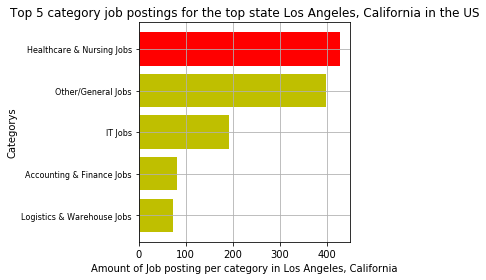

In [22]:
#Defining colors
colors = ['r','y','y','y','y']

#Defining the length of my y axis
y_pos = np.arange(len(tope_city_grouped_asc['category'][:5]))
#Defining my x axis
performance = tope_city_grouped_asc['job title'][:5]

#ploting information for y and x
plt.barh(y_pos, performance, align='center', color = colors)

#labeling y ticks and changing the label size to 8
plt.yticks(y_pos,tope_city_grouped_asc['category'][:5], size = 8)

#Inverting to display the top bar graph
plt.gca().invert_yaxis()  # labels read top-to-bottom

#Adding my labels, title, and definition layout
plt.ylabel('Categorys')
plt.xlabel(f'Amount of Job posting per category in {top_city}, {top_citystate}')
plt.title(f'Top 5 category job postings for the top state {top_city}, {top_citystate} in the US')
plt.tight_layout()
plt.grid()

#saving
plt.savefig(topCityCatGraphData)

### Creating pd.datetime for column date created

In [23]:
#checking to the data types on my dataframe
cleansed_data.dtypes

job title        object
date created     object
category         object
company name     object
city             object
state            object
country          object
lat             float64
lng             float64
latlng           object
month             int64
dtype: object

#### Count of rows

In [24]:
len(cleansed_data)

114572

#### Changing data type for date created column

In [25]:
#Changing data type for date created column
cleansed_data['date created'] = pd.to_datetime(cleansed_data['date created']) 
cleansed_data.dtypes

job title               object
date created    datetime64[ns]
category                object
company name            object
city                    object
state                   object
country                 object
lat                    float64
lng                    float64
latlng                  object
month                    int64
dtype: object

#### Create a copy of cleansed data

In [26]:
cleansed_data_copy = cleansed_data.copy()

# Creating a plot graph by grouping month
#### Grouping by month

In [27]:
date_data = cleansed_data_copy.groupby(['month']).count().reset_index()
date_data.sort_values(by = 'month', ascending = True)

,month,job title,date created,category,company name,city,state,country,lat,lng,latlng
0,1,42,42,42,42,42,42,42,42,42,42
1,2,129,129,129,129,129,129,129,129,129,129
2,3,165,165,165,165,165,165,165,165,165,165
3,4,154,154,154,154,154,154,154,154,154,154
4,5,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556
5,6,1799,1799,1799,1799,1799,1799,1799,1799,1799,1799
6,7,2501,2501,2501,2501,2501,2501,2501,2501,2501,2501
7,8,3181,3181,3181,3181,3181,3181,3181,3181,3181,3181
8,9,9316,9316,9316,9316,9316,9316,9316,9316,9316,9316
9,10,20836,20836,20836,20836,20836,20836,20836,20836,20836,20836


### Graph: Top job postings per month

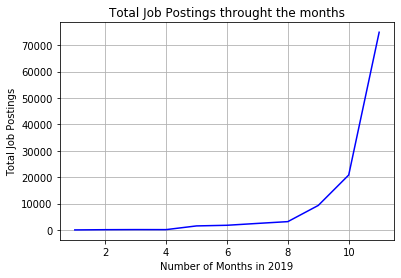

In [28]:
plt.plot(date_data['month'],date_data['job title']  , color = 'blue' )
    
plt.title("Total Job Postings throught the months")
plt.xlabel("Number of Months in 2019")
plt.ylabel("Total Job Postings")
plt.grid()

#saving
plt.savefig(topJobsPlotPerMonth)

plt.show()

## Top state job postings per month

In [29]:

top_state_date = top_state_data.groupby(['month']).count().reset_index()
top_state_date.sort_values(by = 'month', ascending = True)

,month,job title,date created,category,company name,city,state,country,lat,lng,latlng
0,1,7,7,7,7,7,7,7,7,7,7
1,2,30,30,30,30,30,30,30,30,30,30
2,3,25,25,25,25,25,25,25,25,25,25
3,4,11,11,11,11,11,11,11,11,11,11
4,5,219,219,219,219,219,219,219,219,219,219
5,6,301,301,301,301,301,301,301,301,301,301
6,7,280,280,280,280,280,280,280,280,280,280
7,8,382,382,382,382,382,382,382,382,382,382
8,9,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968
9,10,2651,2651,2651,2651,2651,2651,2651,2651,2651,2651


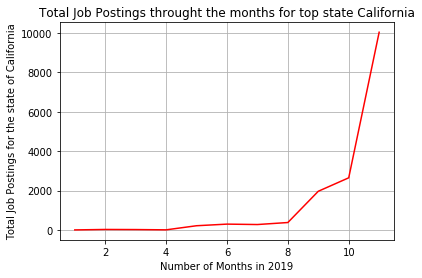

In [30]:
plt.plot(top_state_date['month'],top_state_date['job title']  , color = 'red' )
    
plt.title(f"Total Job Postings throught the months for top state {top_state}")
plt.xlabel("Number of Months in 2019")
plt.ylabel(f"Total Job Postings for the state of {top_state}")
plt.grid()  

#saving
plt.savefig(topJobsPlotStateMonth)

plt.show()



## Top city job postings per month

In [31]:
top_city_date = top_city_data.groupby(['month']).count().reset_index()
top_city_date.sort_values(by = 'month', ascending = True)

,month,job title,date created,category,company name,city,state,country,lat,lng,latlng
0,1,1,1,1,1,1,1,1,1,1,1
1,2,3,3,3,3,3,3,3,3,3,3
2,3,1,1,1,1,1,1,1,1,1,1
3,4,1,1,1,1,1,1,1,1,1,1
4,5,9,9,9,9,9,9,9,9,9,9
5,6,25,25,25,25,25,25,25,25,25,25
6,7,19,19,19,19,19,19,19,19,19,19
7,8,31,31,31,31,31,31,31,31,31,31
8,9,308,308,308,308,308,308,308,308,308,308
9,10,292,292,292,292,292,292,292,292,292,292


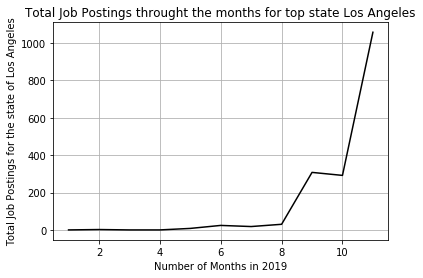

In [32]:
plt.plot(top_city_date['month'],top_city_date['job title']  , color = 'black' )
    
plt.title(f"Total Job Postings throught the months for top state {top_city}")
plt.xlabel("Number of Months in 2019")
plt.ylabel(f"Total Job Postings for the state of {top_city}")
plt.grid()  

#saving
plt.savefig(topJobsPlotCityMonth)

plt.show()

#### Get the unique values for category

In [33]:
cat_unique = cleansed_data_copy['category'].unique()
cat_unique

array(['Healthcare & Nursing Jobs', 'Other/General Jobs', 'Retail Jobs',
       'Logistics & Warehouse Jobs', 'Customer Services Jobs',
       'Sales Jobs', 'Hospitality & Catering Jobs', 'Manufacturing Jobs',
       'Admin Jobs', 'Accounting & Finance Jobs', 'Engineering Jobs',
       'IT Jobs', 'Teaching Jobs', 'Legal Jobs', 'Maintenance Jobs',
       'Part time Jobs', 'PR, Advertising & Marketing Jobs',
       'Trade & Construction Jobs', 'Creative & Design Jobs',
       'Consultancy Jobs', 'HR & Recruitment Jobs', 'Property Jobs',
       'Scientific & QA Jobs', 'Energy, Oil & Gas Jobs',
       'Domestic help & Cleaning Jobs', 'Social work Jobs', 'Travel Jobs',
       'Graduate Jobs', 'Charity & Voluntary Jobs'], dtype=object)

#### Get the unique values for month

In [34]:
months = cleansed_data['month'].unique()
months

array([10, 11,  9,  8,  5,  6,  7,  3,  4,  1,  2], dtype=int64)

In [35]:
#
cat_group = cleansed_data_copy.groupby(['category','month'])
cat_group.count()

job title  date created  company name  city  \
category                  month                                                
Accounting & Finance Jobs 1              1             1             1     1   
                          3              1             1             1     1   
                          4              2             2             2     2   
                          5            185           185           185   185   
                          6            110           110           110   110   
...                                    ...           ...           ...   ...   
Travel Jobs               6              5             5             5     5   
                          8              1             1             1     1   
                          9              1             1             1     1   
                          10            15            15            15    15   
                          11           112           112           112   112   

                                 state  country  lat  lng  latlng  
category                  month                                    
Accounting & Finance Jobs 1          1        1    1    1       1  
                          3          1        1    1    1       1  
                          4          2        2    2    2       2  
                          5        185      185  185  185     185  
                          6        110      110  110  110     110  
...                                ...      ...  ...  ...     ...  
Travel Jobs               6          5        5    5    5       5  
                          8          1        1    1    1       1  
                          9          1        1    1    1       1  
                          10        15       15   15   15      15  
                          11       112      112  112  112     112  

[246 rows x 9 columns]

## Plot: Comparing each category per month

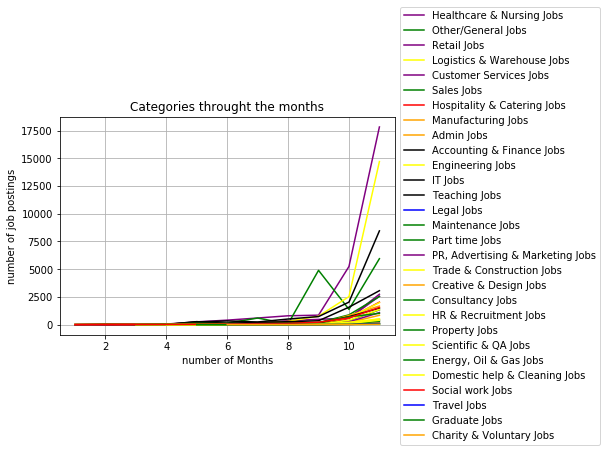

In [37]:
j = -1
for i in range(len(cat_unique)):
    df = pd.DataFrame()
    df = cleansed_data_copy[cleansed_data_copy['category'] == cat_unique[i]]
    df = df.groupby(['month'])
    df = df.count().reset_index()
    df = df.sort_values(by = 'month', ascending = True)
    
    #if statement to append to a datafram variable
    if i != j:
        j = i
        globals()['cat_%s' % i] = pd.DataFrame()
        globals()['cat_%s' % i] = globals()['cat_%s' % i].append(df)

colors  = ["red","green","blue","purple","yellow","orange","black"]
        
for i in range(len(cat_unique)):
    
    color = random.choice(colors)
    plt.plot(globals()['cat_%s' % i]['month'], globals()['cat_%s' % i]['job title'] , color = color, label = '%s' % cat_unique[i] )
    
plt.title("Categories throught the months")
plt.xlabel("number of Months")
plt.ylabel("number of job postings")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

#saving
plt.savefig(topCatPlotCityMonth)

plt.show()